# Import required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# import sklearn libraries for model building
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [4]:
 df = pd.read_csv(r"C:\Users\sayed\OneDrive\Desktop\TITANIC\50_Startups.csv")

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Observations :
1. In the dataset only 5 colunms are there with 50 data points and all the columns are numerics except state column which is categorical data

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Observations :
1. The mean and median of the above columns are nearly equal so it is a Normally distributed dataset

# Missing Value Count

In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Observations : 
1. All the columns are having zero missing values

# Unique Values

In [9]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

# Distribution of Categorical variable

Text(0.5, 1.0, 'Count plot for States')

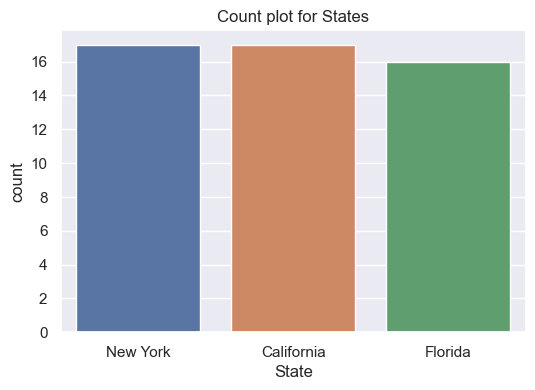

In [10]:
plt.figure(figsize = (6,4), dpi= 100)
sns.countplot(data = df, x = "State")
plt.title("Count plot for States")

# Relationship between categorical variable and target value

<AxesSubplot:xlabel='State', ylabel='Profit'>

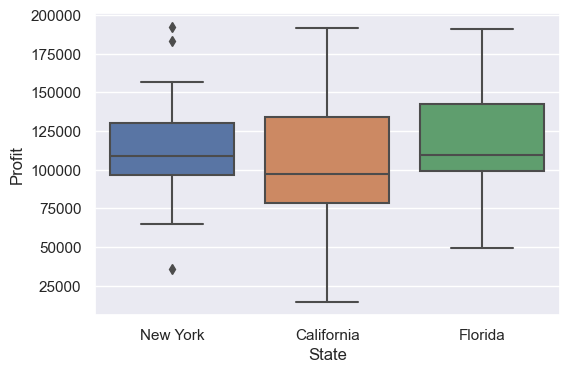

In [11]:
plt.figure(figsize = (6,4), dpi = 100)
sns.boxplot(data = df, x = "State", y = "Profit")

# Distribution plot for numerical feature

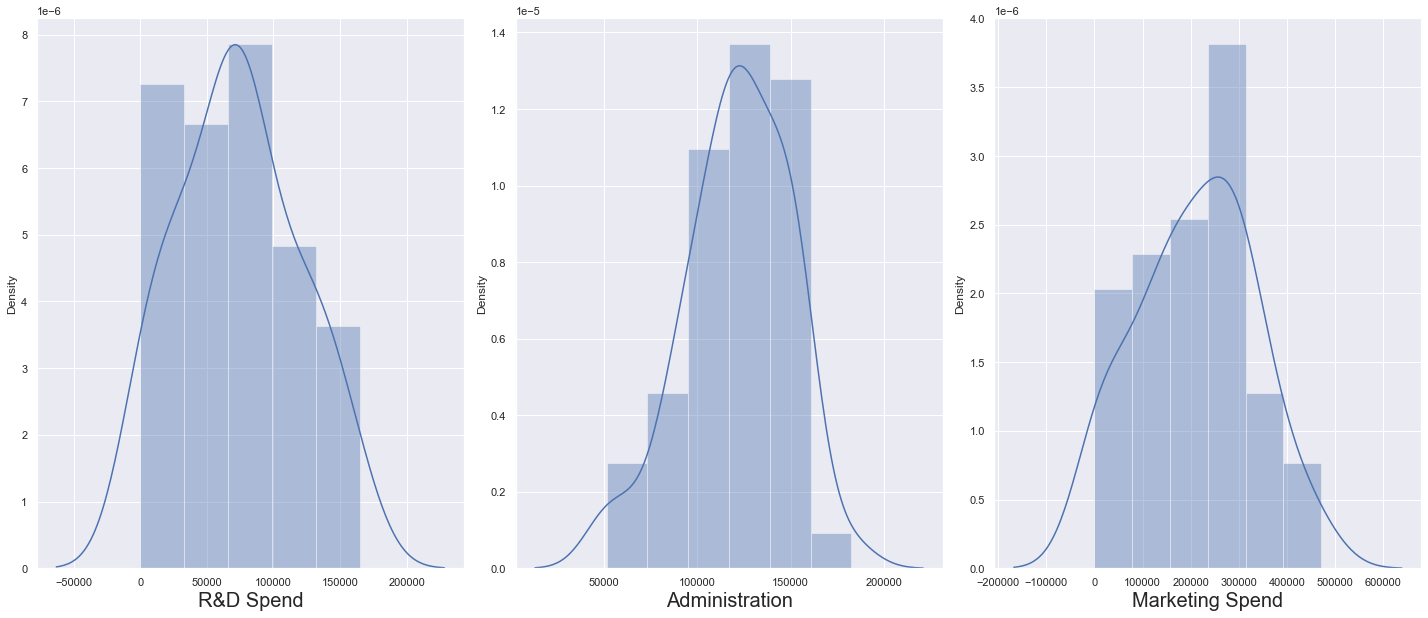

In [12]:
plt.figure(figsize=(20,25))
plotnumber = 1
 
for column in df:
    if plotnumber<=3 :
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Observations :
1. From the graph it is clearly visible that datset is Normally distributed

# Scatter plot for Numerical and Target values

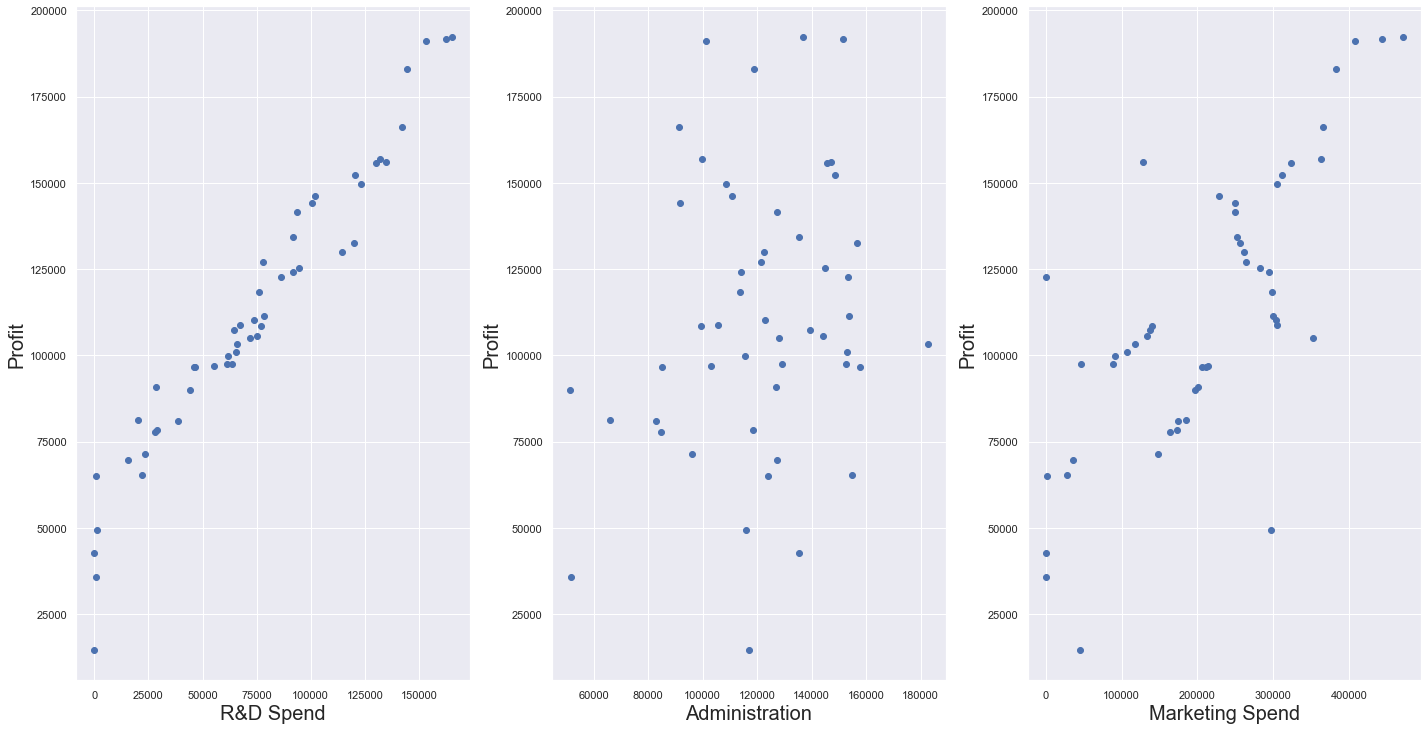

In [13]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
 
for column in df:
    if plotnumber<=3 :
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(df[column], df.Profit)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Profit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Observations :
1. From Scatter plot it is clear that all the numeric features are having linear relationship with profit


# Boxplot for Numerical features

<AxesSubplot:xlabel='Marketing Spend'>

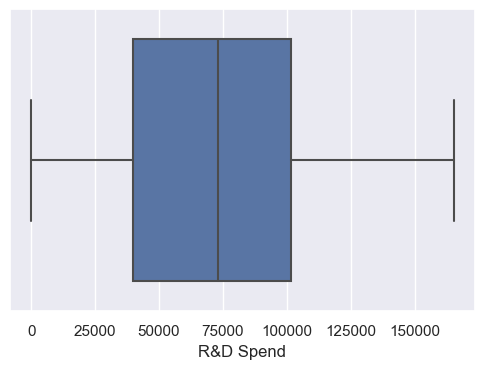

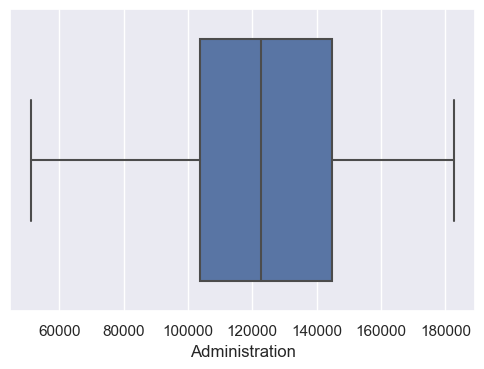

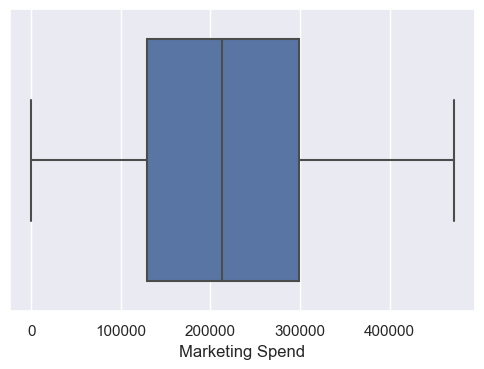

In [14]:
plt.figure(figsize = (6,4), dpi = 100)
sns.boxplot(data = df, x = "R&D Spend")
plt.figure(figsize = (6,4), dpi = 100)
sns.boxplot(data = df, x = "Administration")
plt.figure(figsize = (6,4), dpi = 100)
sns.boxplot(data = df, x = "Marketing Spend")

# Correlation between numerical variables

<AxesSubplot:>

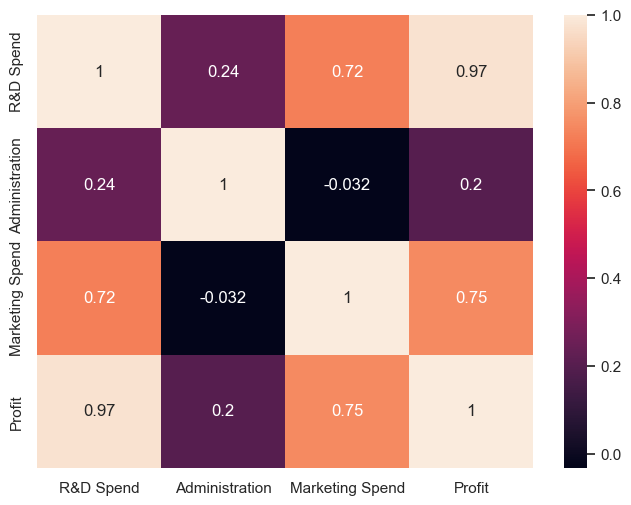

In [15]:
plt.figure(figsize = (8, 6), dpi = 100)
sns.heatmap(df.corr(), annot = True)

# Feature Engineering

In [16]:
df_state_dummies = pd.get_dummies(df["State"],prefix="State",drop_first=True)
df = pd.concat([df, df_state_dummies], axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


# Observations : 
1. As we are having categorical feature called state column so we need to create dummy variable for
that

In [17]:
df = df.drop("State", axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


# Model selection

In [18]:
# Separate Dependent and Independent Variables
X = df.drop('Profit',axis=1)
y = df['Profit']

In [19]:
from sklearn.preprocessing import StandardScaler 

In [20]:
scaler=StandardScaler()

In [21]:
X = scaler.fit_transform(X)

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [23]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
y_hat_lm = lm_model.predict(X_test)
print("r2_score for Linear Regression Model is : ", r2_score(y_test, y_hat_lm))

r2_score for Linear Regression Model is :  0.9101473536069875


In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [25]:
ridge_model = Ridge()
param_grid_ridge = {"alpha" : np.linspace(0, 10, 15),
                   "fit_intercept" : [True, False]}

In [26]:
grid_model = GridSearchCV(estimator = ridge_model, param_grid = param_grid_ridge, cv = 5, verbose = 3)
grid_model.fit(X_train, y_train)
y_hat_ridge = grid_model.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....alpha=0.0, fit_intercept=True;, score=0.925 total time=   0.0s
[CV 2/5] END .....alpha=0.0, fit_intercept=True;, score=0.964 total time=   0.0s
[CV 3/5] END .....alpha=0.0, fit_intercept=True;, score=0.880 total time=   0.0s
[CV 4/5] END .....alpha=0.0, fit_intercept=True;, score=0.981 total time=   0.0s
[CV 5/5] END .....alpha=0.0, fit_intercept=True;, score=0.922 total time=   0.0s
[CV 1/5] END ...alpha=0.0, fit_intercept=False;, score=-2.888 total time=   0.0s
[CV 2/5] END ..alpha=0.0, fit_intercept=False;, score=-16.372 total time=   0.0s
[CV 3/5] END ..alpha=0.0, fit_intercept=False;, score=-27.948 total time=   0.0s
[CV 4/5] END ...alpha=0.0, fit_intercept=False;, score=-7.145 total time=   0.0s
[CV 5/5] END ...alpha=0.0, fit_intercept=False;, score=-9.689 total time=   0.0s
[CV 1/5] END alpha=0.7142857142857143, fit_intercept=True;, score=0.915 total time=   0.0s
[CV 2/5] END alpha=0.7142857142857143

[CV 3/5] END alpha=6.428571428571429, fit_intercept=False;, score=-23.535 total time=   0.0s
[CV 4/5] END alpha=6.428571428571429, fit_intercept=False;, score=-7.788 total time=   0.0s
[CV 5/5] END alpha=6.428571428571429, fit_intercept=False;, score=-8.935 total time=   0.0s
[CV 1/5] END alpha=7.142857142857143, fit_intercept=True;, score=0.828 total time=   0.0s
[CV 2/5] END alpha=7.142857142857143, fit_intercept=True;, score=0.918 total time=   0.0s
[CV 3/5] END alpha=7.142857142857143, fit_intercept=True;, score=0.885 total time=   0.0s
[CV 4/5] END alpha=7.142857142857143, fit_intercept=True;, score=0.911 total time=   0.0s
[CV 5/5] END alpha=7.142857142857143, fit_intercept=True;, score=0.920 total time=   0.0s
[CV 1/5] END alpha=7.142857142857143, fit_intercept=False;, score=-3.509 total time=   0.0s
[CV 2/5] END alpha=7.142857142857143, fit_intercept=False;, score=-11.596 total time=   0.0s
[CV 3/5] END alpha=7.142857142857143, fit_intercept=False;, score=-23.196 total time=   

In [27]:
lasso_model = Lasso()
param_grid_lasso = {"alpha" : np.linspace(0, 10, 15),
                   "fit_intercept" : [True, False],
                   "selection" : ["cyclic", "random"]}

In [28]:
grid_model_lasso = GridSearchCV(estimator = lasso_model, param_grid= param_grid_lasso, cv = 5, verbose = 3)
grid_model_lasso.fit(X_train, y_train)
y_hat_lasso = grid_model_lasso.predict(X_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END alpha=0.0, fit_intercept=True, selection=cyclic;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=0.0, fit_intercept=True, selection=cyclic;, score=0.964 total time=   0.0s
[CV 3/5] END alpha=0.0, fit_intercept=True, selection=cyclic;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=0.0, fit_intercept=True, selection=cyclic;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=0.0, fit_intercept=True, selection=cyclic;, score=0.922 total time=   0.0s
[CV 1/5] END alpha=0.0, fit_intercept=True, selection=random;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=0.0, fit_intercept=True, selection=random;, score=0.964 total time=   0.0s
[CV 3/5] END alpha=0.0, fit_intercept=True, selection=random;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=0.0, fit_intercept=True, selection=random;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=0.0, fit_intercept=True, selection=random;, score=0.922 total time=   0.0

[CV 5/5] END alpha=5.0, fit_intercept=False, selection=cyclic;, score=-9.687 total time=   0.0s
[CV 1/5] END alpha=5.0, fit_intercept=False, selection=random;, score=-2.888 total time=   0.0s
[CV 2/5] END alpha=5.0, fit_intercept=False, selection=random;, score=-16.367 total time=   0.0s
[CV 3/5] END alpha=5.0, fit_intercept=False, selection=random;, score=-27.944 total time=   0.0s
[CV 4/5] END alpha=5.0, fit_intercept=False, selection=random;, score=-7.146 total time=   0.0s
[CV 5/5] END alpha=5.0, fit_intercept=False, selection=random;, score=-9.687 total time=   0.0s
[CV 1/5] END alpha=5.714285714285714, fit_intercept=True, selection=cyclic;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=5.714285714285714, fit_intercept=True, selection=cyclic;, score=0.965 total time=   0.0s
[CV 3/5] END alpha=5.714285714285714, fit_intercept=True, selection=cyclic;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=5.714285714285714, fit_intercept=True, selection=cyclic;, score=0.981 total tim

[CV 3/5] END alpha=8.571428571428571, fit_intercept=True, selection=cyclic;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=8.571428571428571, fit_intercept=True, selection=cyclic;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=8.571428571428571, fit_intercept=True, selection=cyclic;, score=0.923 total time=   0.0s
[CV 1/5] END alpha=8.571428571428571, fit_intercept=True, selection=random;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=8.571428571428571, fit_intercept=True, selection=random;, score=0.965 total time=   0.0s
[CV 3/5] END alpha=8.571428571428571, fit_intercept=True, selection=random;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=8.571428571428571, fit_intercept=True, selection=random;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=8.571428571428571, fit_intercept=True, selection=random;, score=0.923 total time=   0.0s
[CV 1/5] END alpha=8.571428571428571, fit_intercept=False, selection=cyclic;, score=-2.888 total time=   0.0s
[CV 2/5] END alpha=8.57142

In [29]:
elastic_model = ElasticNet()
para_grid_elastic = {"alpha" : np.linspace(0, 10, 15),
                    "l1_ratio" : np.linspace(0, 1, 15),
                    "fit_intercept" : [True, False],
                    "selection" : ["cyclic", "random"]}

In [30]:
grid_model_elastic = GridSearchCV(estimator = elastic_model, param_grid= para_grid_elastic, cv = 5, verbose = 3)
grid_model_elastic.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.964 total time=   0.0s
[CV 3/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.922 total time=   0.0s
[CV 1/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.964 total time=   0.0s
[CV 3/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.0, selection=rand

[CV 4/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.922 total time=   0.0s
[CV 1/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.964 total time=   0.0s
[CV 3/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.922 total time=   0.0s
[CV 1/5] END alpha=0.0, fit_intercept=True, l1_ratio=0.9285714285714285, selection=random;, score=0.925 total time=   0.0s
[CV 2/5] END alp

[CV 5/5] END alpha=0.0, fit_intercept=False, l1_ratio=0.7857142857142857, selection=cyclic;, score=-9.689 total time=   0.0s
[CV 1/5] END alpha=0.0, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-2.888 total time=   0.0s
[CV 2/5] END alpha=0.0, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-16.372 total time=   0.0s
[CV 3/5] END alpha=0.0, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-27.948 total time=   0.0s
[CV 4/5] END alpha=0.0, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-7.145 total time=   0.0s
[CV 5/5] END alpha=0.0, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-9.689 total time=   0.0s
[CV 1/5] END alpha=0.0, fit_intercept=False, l1_ratio=0.8571428571428571, selection=cyclic;, score=-2.888 total time=   0.0s
[CV 2/5] END alpha=0.0, fit_intercept=False, l1_ratio=0.8571428571428571, selection=cyclic;, score=-16.372 total time=   0.

[CV 1/5] END alpha=0.7142857142857143, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.845 total time=   0.0s
[CV 2/5] END alpha=0.7142857142857143, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.928 total time=   0.0s
[CV 3/5] END alpha=0.7142857142857143, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.885 total time=   0.0s
[CV 4/5] END alpha=0.7142857142857143, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.926 total time=   0.0s
[CV 5/5] END alpha=0.7142857142857143, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.925 total time=   0.0s
[CV 1/5] END alpha=0.7142857142857143, fit_intercept=True, l1_ratio=0.7142857142857142, selection=random;, score=0.845 total time=   0.0s
[CV 2/5] END alpha=0.7142857142857143, fit_intercept=True, l1_ratio=0.7142857142857142, selection=random;, score=0.928 total time=   0.0s
[CV 3/5] END alpha=0.7142857142857

[CV 5/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.14285714285714285, selection=random;, score=-8.163 total time=   0.0s
[CV 1/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-3.701 total time=   0.0s
[CV 2/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-10.420 total time=   0.0s
[CV 3/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-20.265 total time=   0.0s
[CV 4/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-8.147 total time=   0.0s
[CV 5/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-8.241 total time=   0.0s
[CV 1/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=random;, score=-3.701 total time=   0.0s
[CV 2/5] EN

[CV 1/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-3.099 total time=   0.0s
[CV 2/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-14.467 total time=   0.0s
[CV 3/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-26.654 total time=   0.0s
[CV 4/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-7.329 total time=   0.0s
[CV 5/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-9.518 total time=   0.0s
[CV 1/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-3.099 total time=   0.0s
[CV 2/5] END alpha=0.7142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-14.467 total time=   0.0s
[CV 3/5] END alph

[CV 5/5] END alpha=1.4285714285714286, fit_intercept=True, l1_ratio=0.42857142857142855, selection=random;, score=0.844 total time=   0.0s
[CV 1/5] END alpha=1.4285714285714286, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.707 total time=   0.0s
[CV 2/5] END alpha=1.4285714285714286, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.848 total time=   0.0s
[CV 3/5] END alpha=1.4285714285714286, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.876 total time=   0.0s
[CV 4/5] END alpha=1.4285714285714286, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.802 total time=   0.0s
[CV 5/5] END alpha=1.4285714285714286, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.859 total time=   0.0s
[CV 1/5] END alpha=1.4285714285714286, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.707 total time=   0.0s
[CV 2/5] END alpha=1.4285714285714286, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.848 total time=   0.0s


[CV 5/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-7.396 total time=   0.0s
[CV 1/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-3.815 total time=   0.0s
[CV 2/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-9.677 total time=   0.0s
[CV 3/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-16.727 total time=   0.0s
[CV 4/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-8.504 total time=   0.0s
[CV 5/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-7.396 total time=   0.0s
[CV 1/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.07142857142857142, selection=cyclic;, score=-3.810 total time=   0.0s
[CV 2/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.07142857142857142, selection=cyclic;,

[CV 2/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-10.838 total time=   0.0s
[CV 3/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-21.515 total time=   0.0s
[CV 4/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-8.021 total time=   0.0s
[CV 5/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-8.512 total time=   0.0s
[CV 1/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=random;, score=-3.633 total time=   0.0s
[CV 2/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=random;, score=-10.838 total time=   0.0s
[CV 3/5] END alpha=1.4285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=random;, score=-21.515 total time=   0.0s
[CV 4/5] END alp

[CV 3/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.14285714285714285, selection=random;, score=0.785 total time=   0.0s
[CV 4/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.14285714285714285, selection=random;, score=0.613 total time=   0.0s
[CV 5/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.14285714285714285, selection=random;, score=0.697 total time=   0.0s
[CV 1/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.545 total time=   0.0s
[CV 2/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.728 total time=   0.0s
[CV 3/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.800 total time=   0.0s
[CV 4/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.635 total time=   0.0s
[CV 5/5] END alpha=2.1428571428571

[CV 2/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.885 total time=   0.0s
[CV 3/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.884 total time=   0.0s
[CV 4/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.858 total time=   0.0s
[CV 5/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.896 total time=   0.0s
[CV 1/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.769 total time=   0.0s
[CV 2/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.885 total time=   0.0s
[CV 3/5] END alpha=2.142857142857143, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.884 total time=   0.0s
[CV 4/5] END alpha=2.142857142857143, fit

[CV 2/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.2857142857142857, selection=cyclic;, score=-9.647 total time=   0.0s
[CV 3/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.2857142857142857, selection=cyclic;, score=-16.503 total time=   0.0s
[CV 4/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.2857142857142857, selection=cyclic;, score=-8.531 total time=   0.0s
[CV 5/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.2857142857142857, selection=cyclic;, score=-7.337 total time=   0.0s
[CV 1/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-3.820 total time=   0.0s
[CV 2/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-9.647 total time=   0.0s
[CV 3/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-16.503 total time=   0.0s
[CV 4/5] END alpha=2.1428

[CV 1/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-3.362 total time=   0.0s
[CV 2/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-12.545 total time=   0.0s
[CV 3/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-24.684 total time=   0.0s
[CV 4/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-7.631 total time=   0.0s
[CV 5/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-9.164 total time=   0.0s
[CV 1/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-3.362 total time=   0.0s
[CV 2/5] END alpha=2.142857142857143, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-12.545 total time=   0.0s
[CV 3/5] END alpha=2.142

[CV 4/5] END alpha=2.857142857142857, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.674 total time=   0.0s
[CV 5/5] END alpha=2.857142857142857, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.753 total time=   0.0s
[CV 1/5] END alpha=2.857142857142857, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.580 total time=   0.0s
[CV 2/5] END alpha=2.857142857142857, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.758 total time=   0.0s
[CV 3/5] END alpha=2.857142857142857, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.824 total time=   0.0s
[CV 4/5] END alpha=2.857142857142857, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.674 total time=   0.0s
[CV 5/5] END alpha=2.857142857142857, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.753 total time=   0.0s
[CV 1/5] END alpha=2.857142857142857, fit_intercept=True, l1_ratio=0.5714285714285714, selection=cyclic;, score=0.611 total time=   0.0s
[CV 2/5] 

[CV 3/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-14.832 total time=   0.0s
[CV 4/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-8.777 total time=   0.0s
[CV 5/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-6.861 total time=   0.0s
[CV 1/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-3.847 total time=   0.0s
[CV 2/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-9.501 total time=   0.0s
[CV 3/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-14.832 total time=   0.0s
[CV 4/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-8.777 total time=   0.0s
[CV 5/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-6.861 total time=   0.0s
[CV 1/

[CV 5/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.5714285714285714, selection=random;, score=-7.532 total time=   0.0s
[CV 1/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.6428571428571428, selection=cyclic;, score=-3.787 total time=   0.0s
[CV 2/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.6428571428571428, selection=cyclic;, score=-9.866 total time=   0.0s
[CV 3/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.6428571428571428, selection=cyclic;, score=-17.916 total time=   0.0s
[CV 4/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.6428571428571428, selection=cyclic;, score=-8.376 total time=   0.0s
[CV 5/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.6428571428571428, selection=cyclic;, score=-7.697 total time=   0.0s
[CV 1/5] END alpha=2.857142857142857, fit_intercept=False, l1_ratio=0.6428571428571428, selection=random;, score=-3.787 total time=   0.0s
[CV 2/5] END alpha=2.85714

[CV 1/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.430 total time=   0.0s
[CV 2/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.616 total time=   0.0s
[CV 3/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.693 total time=   0.0s
[CV 4/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.496 total time=   0.0s
[CV 5/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.21428571428571427, selection=cyclic;, score=0.583 total time=   0.0s
[CV 1/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.21428571428571427, selection=random;, score=0.430 total time=   0.0s
[CV 2/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.21428571428571427, selection=random;, score=0.616 total time=   0.0s
[CV 3/5] END alpha=3.571428

[CV 1/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.696 total time=   0.0s
[CV 2/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.842 total time=   0.0s
[CV 3/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.874 total time=   0.0s
[CV 4/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.792 total time=   0.0s
[CV 5/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.852 total time=   0.0s
[CV 1/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.696 total time=   0.0s
[CV 2/5] END alpha=3.5714285714285716, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.842 total time=   0.0s
[CV 3/5] END alpha=3.5714285714285

[CV 2/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.2857142857142857, selection=cyclic;, score=-9.514 total time=   0.0s
[CV 3/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.2857142857142857, selection=cyclic;, score=-15.086 total time=   0.0s
[CV 4/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.2857142857142857, selection=cyclic;, score=-8.732 total time=   0.0s
[CV 5/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.2857142857142857, selection=cyclic;, score=-6.938 total time=   0.0s
[CV 1/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-3.843 total time=   0.0s
[CV 2/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-9.514 total time=   0.0s
[CV 3/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-15.086 total time=   0.0s
[CV 4/5] END alpha

[CV 3/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.8571428571428571, selection=cyclic;, score=-20.643 total time=   0.0s
[CV 4/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.8571428571428571, selection=cyclic;, score=-8.110 total time=   0.0s
[CV 5/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.8571428571428571, selection=cyclic;, score=-8.324 total time=   0.0s
[CV 1/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.8571428571428571, selection=random;, score=-3.682 total time=   0.0s
[CV 2/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.8571428571428571, selection=random;, score=-10.536 total time=   0.0s
[CV 3/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.8571428571428571, selection=random;, score=-20.643 total time=   0.0s
[CV 4/5] END alpha=3.5714285714285716, fit_intercept=False, l1_ratio=0.8571428571428571, selection=random;, score=-8.110 total time=   0.0s
[CV 5/5] END alph

[CV 3/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.670 total time=   0.0s
[CV 4/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.471 total time=   0.0s
[CV 5/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.558 total time=   0.0s
[CV 1/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.3571428571428571, selection=cyclic;, score=0.434 total time=   0.0s
[CV 2/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.3571428571428571, selection=cyclic;, score=0.620 total time=   0.0s
[CV 3/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.3571428571428571, selection=cyclic;, score=0.697 total time=   0.0s
[CV 4/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.3571428571428571, selection=cyclic;, score=0.502 total time=   0.0s
[CV 5/5] END alpha=4.285714285714286, fit

[CV 3/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.881 total time=   0.0s
[CV 4/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.823 total time=   0.0s
[CV 5/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.874 total time=   0.0s
[CV 1/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.812 total time=   0.0s
[CV 2/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.909 total time=   0.0s
[CV 3/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.885 total time=   0.0s
[CV 4/5] END alpha=4.285714285714286, fit_intercept=True, l1_ratio=0.9285714285714285, selection=cyclic;, score=0.897 total time=   0.0s
[CV 5/5] END alpha=4.285714285714286, fit

[CV 2/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-9.544 total time=   0.0s
[CV 3/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-15.519 total time=   0.0s
[CV 4/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-8.663 total time=   0.0s
[CV 5/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-7.065 total time=   0.0s
[CV 1/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-3.837 total time=   0.0s
[CV 2/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-9.544 total time=   0.0s
[CV 3/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-15.519 total time=   0.0s
[CV 4/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-8.663 total time=   0.0s
[CV 5/

[CV 3/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-22.573 total time=   0.0s
[CV 4/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-7.904 total time=   0.0s
[CV 5/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-8.736 total time=   0.0s
[CV 1/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=1.0, selection=cyclic;, score=-2.888 total time=   0.0s
[CV 2/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=1.0, selection=cyclic;, score=-16.368 total time=   0.0s
[CV 3/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=1.0, selection=cyclic;, score=-27.945 total time=   0.0s
[CV 4/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=1.0, selection=cyclic;, score=-7.146 total time=   0.0s
[CV 5/5] END alpha=4.285714285714286, fit_intercept=False, l1_ratio=1.0, selection=c

[CV 5/5] END alpha=5.0, fit_intercept=True, l1_ratio=0.42857142857142855, selection=cyclic;, score=0.578 total time=   0.0s
[CV 1/5] END alpha=5.0, fit_intercept=True, l1_ratio=0.42857142857142855, selection=random;, score=0.426 total time=   0.0s
[CV 2/5] END alpha=5.0, fit_intercept=True, l1_ratio=0.42857142857142855, selection=random;, score=0.611 total time=   0.0s
[CV 3/5] END alpha=5.0, fit_intercept=True, l1_ratio=0.42857142857142855, selection=random;, score=0.688 total time=   0.0s
[CV 4/5] END alpha=5.0, fit_intercept=True, l1_ratio=0.42857142857142855, selection=random;, score=0.491 total time=   0.0s
[CV 5/5] END alpha=5.0, fit_intercept=True, l1_ratio=0.42857142857142855, selection=random;, score=0.578 total time=   0.0s
[CV 1/5] END alpha=5.0, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.456 total time=   0.0s
[CV 2/5] END alpha=5.0, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.643 total time=   0.0s
[CV 3/5] END alpha=5.0, fit_intercept=Tr

[CV 3/5] END alpha=5.0, fit_intercept=True, l1_ratio=1.0, selection=random;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=5.0, fit_intercept=True, l1_ratio=1.0, selection=random;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=5.0, fit_intercept=True, l1_ratio=1.0, selection=random;, score=0.923 total time=   0.0s
[CV 1/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-3.863 total time=   0.0s
[CV 2/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-9.495 total time=   0.0s
[CV 3/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-13.873 total time=   0.0s
[CV 4/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-8.989 total time=   0.0s
[CV 5/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-6.551 total time=   0.0s
[CV 1/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-3.863 total time=   0.0s
[CV 2/5] END al

[CV 5/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-6.952 total time=   0.0s
[CV 1/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-3.837 total time=   0.0s
[CV 2/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-9.544 total time=   0.0s
[CV 3/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-15.519 total time=   0.0s
[CV 4/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-8.663 total time=   0.0s
[CV 5/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-7.065 total time=   0.0s
[CV 1/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.5714285714285714, selection=random;, score=-3.837 total time=   0.0s
[CV 2/5] END alpha=5.0, fit_intercept=False, l1_ratio=0.5714285714285714, selection=random;, score=-9.544 total time=   0.0s
[CV 3/5] END a

[CV 1/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.347 total time=   0.0s
[CV 2/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.520 total time=   0.0s
[CV 3/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.589 total time=   0.0s
[CV 4/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.384 total time=   0.0s
[CV 5/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.471 total time=   0.0s
[CV 1/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=0.3571428571428571, selection=cyclic;, score=0.369 total time=   0.0s
[CV 2/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=0.3571428571428571, selection=cyclic;, score=0.547 total time=   0.0s
[CV 3/5] END alpha=5.714285714285714, fit

[CV 3/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=1.0, selection=random;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=1.0, selection=random;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=5.714285714285714, fit_intercept=True, l1_ratio=1.0, selection=random;, score=0.923 total time=   0.0s
[CV 1/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-3.866 total time=   0.0s
[CV 2/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-9.504 total time=   0.0s
[CV 3/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-13.707 total time=   0.0s
[CV 4/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-9.036 total time=   0.0s
[CV 5/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-6.494 total time=   0.0s
[CV 1/5] END 

[CV 2/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-9.753 total time=   0.0s
[CV 3/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-17.253 total time=   0.0s
[CV 4/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-8.445 total time=   0.0s
[CV 5/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.7857142857142857, selection=random;, score=-7.532 total time=   0.0s
[CV 1/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.8571428571428571, selection=cyclic;, score=-3.761 total time=   0.0s
[CV 2/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.8571428571428571, selection=cyclic;, score=-10.038 total time=   0.0s
[CV 3/5] END alpha=5.714285714285714, fit_intercept=False, l1_ratio=0.8571428571428571, selection=cyclic;, score=-18.771 total time=   0.0s
[CV 4/5] END alpha=5.714

[CV 4/5] END alpha=6.428571428571429, fit_intercept=True, l1_ratio=0.2857142857142857, selection=cyclic;, score=0.349 total time=   0.0s
[CV 5/5] END alpha=6.428571428571429, fit_intercept=True, l1_ratio=0.2857142857142857, selection=cyclic;, score=0.435 total time=   0.0s
[CV 1/5] END alpha=6.428571428571429, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.321 total time=   0.0s
[CV 2/5] END alpha=6.428571428571429, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.489 total time=   0.0s
[CV 3/5] END alpha=6.428571428571429, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.553 total time=   0.0s
[CV 4/5] END alpha=6.428571428571429, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.349 total time=   0.0s
[CV 5/5] END alpha=6.428571428571429, fit_intercept=True, l1_ratio=0.2857142857142857, selection=random;, score=0.435 total time=   0.0s
[CV 1/5] END alpha=6.428571428571429, fit

[CV 1/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-3.869 total time=   0.0s
[CV 2/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-9.513 total time=   0.0s
[CV 3/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-13.578 total time=   0.0s
[CV 4/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-9.076 total time=   0.0s
[CV 5/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.0, selection=cyclic;, score=-6.448 total time=   0.0s
[CV 1/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-3.869 total time=   0.0s
[CV 2/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-9.513 total time=   0.0s
[CV 3/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.0, selection=random;, score=-13.578 total time=   0.0s
[CV 4/

[CV 3/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-14.590 total time=   0.0s
[CV 4/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-8.823 total time=   0.0s
[CV 5/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-6.786 total time=   0.0s
[CV 1/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-3.846 total time=   0.0s
[CV 2/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-9.505 total time=   0.0s
[CV 3/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-14.911 total time=   0.0s
[CV 4/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.5714285714285714, selection=cyclic;, score=-8.762 total time=   0.0s
[CV 5/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=0.

[CV 2/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=1.0, selection=random;, score=-16.366 total time=   0.0s
[CV 3/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=1.0, selection=random;, score=-27.943 total time=   0.0s
[CV 4/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=1.0, selection=random;, score=-7.146 total time=   0.0s
[CV 5/5] END alpha=6.428571428571429, fit_intercept=False, l1_ratio=1.0, selection=random;, score=-9.687 total time=   0.0s
[CV 1/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.236 total time=   0.0s
[CV 2/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.375 total time=   0.0s
[CV 3/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.419 total time=   0.0s
[CV 4/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.222 total time=   0.0s
[CV 5/5] END a

[CV 1/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.6428571428571428, selection=cyclic;, score=0.452 total time=   0.0s
[CV 2/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.6428571428571428, selection=cyclic;, score=0.639 total time=   0.0s
[CV 3/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.6428571428571428, selection=cyclic;, score=0.716 total time=   0.0s
[CV 4/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.6428571428571428, selection=cyclic;, score=0.524 total time=   0.0s
[CV 5/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.6428571428571428, selection=cyclic;, score=0.610 total time=   0.0s
[CV 1/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.6428571428571428, selection=random;, score=0.452 total time=   0.0s
[CV 2/5] END alpha=7.142857142857143, fit_intercept=True, l1_ratio=0.6428571428571428, selection=random;, score=0.639 total time=   0.0s
[CV 3/5] END alpha=7.142857142857143, fit

[CV 5/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.14285714285714285, selection=random;, score=-6.466 total time=   0.0s
[CV 1/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-3.866 total time=   0.0s
[CV 2/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-9.502 total time=   0.0s
[CV 3/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-13.728 total time=   0.0s
[CV 4/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-9.030 total time=   0.0s
[CV 5/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=cyclic;, score=-6.501 total time=   0.0s
[CV 1/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.21428571428571427, selection=random;, score=-3.866 total time=   0.0s
[CV 2/5] END alpha=

[CV 4/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.6428571428571428, selection=cyclic;, score=-8.732 total time=   0.0s
[CV 5/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.6428571428571428, selection=cyclic;, score=-6.938 total time=   0.0s
[CV 1/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.6428571428571428, selection=random;, score=-3.843 total time=   0.0s
[CV 2/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.6428571428571428, selection=random;, score=-9.514 total time=   0.0s
[CV 3/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.6428571428571428, selection=random;, score=-15.086 total time=   0.0s
[CV 4/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.6428571428571428, selection=random;, score=-8.732 total time=   0.0s
[CV 5/5] END alpha=7.142857142857143, fit_intercept=False, l1_ratio=0.6428571428571428, selection=random;, score=-6.938 total time=   0.0s
[CV 1/5] END alpha=7.14285

[CV 1/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.14285714285714285, selection=cyclic;, score=0.246 total time=   0.0s
[CV 2/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.14285714285714285, selection=cyclic;, score=0.390 total time=   0.0s
[CV 3/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.14285714285714285, selection=cyclic;, score=0.437 total time=   0.0s
[CV 4/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.14285714285714285, selection=cyclic;, score=0.238 total time=   0.0s
[CV 5/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.14285714285714285, selection=cyclic;, score=0.323 total time=   0.0s
[CV 1/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.14285714285714285, selection=random;, score=0.246 total time=   0.0s
[CV 2/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.14285714285714285, selection=random;, score=0.390 total time=   0.0s
[CV 3/5] END alpha=7.8571428571428

[CV 3/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.8571428571428571, selection=cyclic;, score=0.850 total time=   0.0s
[CV 4/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.8571428571428571, selection=cyclic;, score=0.725 total time=   0.0s
[CV 5/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.8571428571428571, selection=cyclic;, score=0.798 total time=   0.0s
[CV 1/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.628 total time=   0.0s
[CV 2/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.795 total time=   0.0s
[CV 3/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.850 total time=   0.0s
[CV 4/5] END alpha=7.857142857142858, fit_intercept=True, l1_ratio=0.8571428571428571, selection=random;, score=0.725 total time=   0.0s
[CV 5/5] END alpha=7.857142857142858, fit

[CV 3/5] END alpha=7.857142857142858, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-14.229 total time=   0.0s
[CV 4/5] END alpha=7.857142857142858, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-8.900 total time=   0.0s
[CV 5/5] END alpha=7.857142857142858, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-6.670 total time=   0.0s
[CV 1/5] END alpha=7.857142857142858, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-3.856 total time=   0.0s
[CV 2/5] END alpha=7.857142857142858, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-9.488 total time=   0.0s
[CV 3/5] END alpha=7.857142857142858, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-14.229 total time=   0.0s
[CV 4/5] END alpha=7.857142857142858, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-8.900 total time=   0.0s
[CV 5/5] END alpha=7.857142857142858, fit_intercept=False, l1_ratio=0.5, selection=random;, score=-6.670 total time=   0.0s
[CV 1/

[CV 3/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.366 total time=   0.0s
[CV 4/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.174 total time=   0.0s
[CV 5/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.258 total time=   0.0s
[CV 1/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.07142857142857142, selection=cyclic;, score=0.217 total time=   0.0s
[CV 2/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.07142857142857142, selection=cyclic;, score=0.349 total time=   0.0s
[CV 3/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.07142857142857142, selection=cyclic;, score=0.387 total time=   0.0s
[CV 4/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.07142857142857142, selection=cyclic;, score=0.193 total time=   0.0s
[CV 5/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.0714285714285

[CV 5/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.5, selection=cyclic;, score=0.456 total time=   0.0s
[CV 1/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.336 total time=   0.0s
[CV 2/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.507 total time=   0.0s
[CV 3/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.574 total time=   0.0s
[CV 4/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.370 total time=   0.0s
[CV 5/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.5, selection=random;, score=0.456 total time=   0.0s
[CV 1/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.5714285714285714, selection=cyclic;, score=0.369 total time=   0.0s
[CV 2/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.5714285714285714, selection=cyclic;, score=0.547 total time=  

[CV 5/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=0.9285714285714285, selection=random;, score=0.874 total time=   0.0s
[CV 1/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=1.0, selection=cyclic;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=1.0, selection=cyclic;, score=0.965 total time=   0.0s
[CV 3/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=1.0, selection=cyclic;, score=0.880 total time=   0.0s
[CV 4/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=1.0, selection=cyclic;, score=0.981 total time=   0.0s
[CV 5/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=1.0, selection=cyclic;, score=0.923 total time=   0.0s
[CV 1/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=1.0, selection=random;, score=0.925 total time=   0.0s
[CV 2/5] END alpha=8.571428571428571, fit_intercept=True, l1_ratio=1.0, selection=random;, score=0.965 total time=   0.0s
[CV 3/5] 

[CV 2/5] END alpha=8.571428571428571, fit_intercept=False, l1_ratio=0.42857142857142855, selection=random;, score=-9.494 total time=   0.0s
[CV 3/5] END alpha=8.571428571428571, fit_intercept=False, l1_ratio=0.42857142857142855, selection=random;, score=-13.900 total time=   0.0s
[CV 4/5] END alpha=8.571428571428571, fit_intercept=False, l1_ratio=0.42857142857142855, selection=random;, score=-8.982 total time=   0.0s
[CV 5/5] END alpha=8.571428571428571, fit_intercept=False, l1_ratio=0.42857142857142855, selection=random;, score=-6.560 total time=   0.0s
[CV 1/5] END alpha=8.571428571428571, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-3.859 total time=   0.0s
[CV 2/5] END alpha=8.571428571428571, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-9.489 total time=   0.0s
[CV 3/5] END alpha=8.571428571428571, fit_intercept=False, l1_ratio=0.5, selection=cyclic;, score=-14.091 total time=   0.0s
[CV 4/5] END alpha=8.571428571428571, fit_intercept=False, l1_rati

[CV 4/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.154 total time=   0.0s
[CV 5/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.0, selection=cyclic;, score=0.237 total time=   0.0s
[CV 1/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.192 total time=   0.0s
[CV 2/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.313 total time=   0.0s
[CV 3/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.343 total time=   0.0s
[CV 4/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.154 total time=   0.0s
[CV 5/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.0, selection=random;, score=0.237 total time=   0.0s
[CV 1/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.07142857142857142, selection=cyclic;, score=0.204 total time=   0.0s
[CV 2/5]

[CV 5/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.6428571428571428, selection=random;, score=0.534 total time=   0.0s
[CV 1/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.443 total time=   0.0s
[CV 2/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.629 total time=   0.0s
[CV 3/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.707 total time=   0.0s
[CV 4/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.512 total time=   0.0s
[CV 5/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.7142857142857142, selection=cyclic;, score=0.599 total time=   0.0s
[CV 1/5] END alpha=9.285714285714286, fit_intercept=True, l1_ratio=0.7142857142857142, selection=random;, score=0.443 total time=   0.0s
[CV 2/5] END alpha=9.285714285714286, fit

[CV 4/5] END alpha=9.285714285714286, fit_intercept=False, l1_ratio=0.6428571428571428, selection=random;, score=-8.835 total time=   0.0s
[CV 5/5] END alpha=9.285714285714286, fit_intercept=False, l1_ratio=0.6428571428571428, selection=random;, score=-6.767 total time=   0.0s
[CV 1/5] END alpha=9.285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-3.845 total time=   0.0s
[CV 2/5] END alpha=9.285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-9.509 total time=   0.0s
[CV 3/5] END alpha=9.285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-14.995 total time=   0.0s
[CV 4/5] END alpha=9.285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-8.748 total time=   0.0s
[CV 5/5] END alpha=9.285714285714286, fit_intercept=False, l1_ratio=0.7142857142857142, selection=cyclic;, score=-6.911 total time=   0.0s
[CV 1/5] END alpha=9.28571

[CV 5/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.07142857142857142, selection=cyclic;, score=0.237 total time=   0.0s
[CV 1/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.07142857142857142, selection=random;, score=0.192 total time=   0.0s
[CV 2/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.07142857142857142, selection=random;, score=0.313 total time=   0.0s
[CV 3/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.07142857142857142, selection=random;, score=0.343 total time=   0.0s
[CV 4/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.07142857142857142, selection=random;, score=0.154 total time=   0.0s
[CV 5/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.07142857142857142, selection=random;, score=0.237 total time=   0.0s
[CV 1/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.14285714285714285, selection=cyclic;, score=0.205 total time=   0.0s
[CV 2/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.14285714285714285, selection=cyclic;, score=0.332 total time=   0.0s


[CV 4/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.572 total time=   0.0s
[CV 5/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.7857142857142857, selection=cyclic;, score=0.658 total time=   0.0s
[CV 1/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.491 total time=   0.0s
[CV 2/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.678 total time=   0.0s
[CV 3/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.755 total time=   0.0s
[CV 4/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.572 total time=   0.0s
[CV 5/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.7857142857142857, selection=random;, score=0.658 total time=   0.0s
[CV 1/5] END alpha=10.0, fit_intercept=True, l1_ratio=0.8571428571428571, selection=cyclic;, score=0.580 total time=   0.0s
[CV 2/5]

[CV 3/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-13.475 total time=   0.0s
[CV 4/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-9.110 total time=   0.0s
[CV 5/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.2857142857142857, selection=random;, score=-6.411 total time=   0.0s
[CV 1/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.3571428571428571, selection=cyclic;, score=-3.869 total time=   0.0s
[CV 2/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.3571428571428571, selection=cyclic;, score=-9.513 total time=   0.0s
[CV 3/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.3571428571428571, selection=cyclic;, score=-13.578 total time=   0.0s
[CV 4/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.3571428571428571, selection=cyclic;, score=-9.076 total time=   0.0s
[CV 5/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.3571428571428571, selection=cyclic;, score=-6.448 total tim

[CV 5/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.9285714285714285, selection=cyclic;, score=-8.022 total time=   0.0s
[CV 1/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-3.742 total time=   0.0s
[CV 2/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-10.160 total time=   0.0s
[CV 3/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-19.297 total time=   0.0s
[CV 4/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-8.240 total time=   0.0s
[CV 5/5] END alpha=10.0, fit_intercept=False, l1_ratio=0.9285714285714285, selection=random;, score=-8.022 total time=   0.0s
[CV 1/5] END alpha=10.0, fit_intercept=False, l1_ratio=1.0, selection=cyclic;, score=-2.889 total time=   0.0s
[CV 2/5] END alpha=10.0, fit_intercept=False, l1_ratio=1.0, selection=cyclic;, score=-16.362 total time=   0.0s
[CV 3/5] END alpha=

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
        3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
        7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [31]:
y_hat_elastic = grid_model_elastic.predict(X_test)

In [32]:
print("r2_score for Ridge Model is : ", r2_score(y_test, y_hat_ridge))

r2_score for Ridge Model is :  0.9101473536069874


In [33]:
print("r2_score for Ridge Model is : ", r2_score(y_test, y_hat_lasso))

r2_score for Ridge Model is :  0.9103811708859249


In [34]:
print("r2_score for Ridge Model is : ", r2_score(y_test, y_hat_elastic))

r2_score for Ridge Model is :  0.9103041588817918


In [35]:
decision_model = DecisionTreeRegressor()
param_grid_decision = {"criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
             "splitter" : ["best", "random"],
             "max_features" : ["auto", "sqrt", "log2"]}

In [36]:
grid_decision = GridSearchCV(estimator = decision_model, param_grid=param_grid_decision)
grid_decision.fit(X_train, y_train)
y_hat_decision = grid_decision.predict(X_test)

In [37]:
print("r2_score for Ridge Model is : ", r2_score(y_test, y_hat_decision))

r2_score for Ridge Model is :  0.8593809123149713


In [38]:
random_model = RandomForestRegressor()
para_grid_random = {'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 400, num = 100)],
                'max_features': ['auto', 'sqrt'],
                'max_depth':[int(x) for x in np.linspace(10, 31, num = 11)],
                'min_samples_leaf':[1, 2]}

In [39]:
print("r2_score for Linear Regression Model is : ", r2_score(y_test, y_hat_lm))
print("r2_score for Ridge Model is : ", r2_score(y_test, y_hat_ridge))
print("r2_score for Lasso Model is : ", r2_score(y_test, y_hat_lasso))
print("r2_score for ElasticNet Model is : ", r2_score(y_test, y_hat_elastic))
print("r2_score for Decision Tree Model is : ", r2_score(y_test, y_hat_decision))

r2_score for Linear Regression Model is :  0.9101473536069875
r2_score for Ridge Model is :  0.9101473536069874
r2_score for Lasso Model is :  0.9103811708859249
r2_score for ElasticNet Model is :  0.9103041588817918
r2_score for Decision Tree Model is :  0.8593809123149713


# Observations 

In [40]:
# From above 5 models hieghst r2_score we got from linear model, so for model building we used linear regression 


# Model Building

In [43]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)


0.9101473536069875

# Summary

1. In the above dataset total we have 5 columns & 50 rows 
2. In which 1 is categorical & others are continuous columns
3. In the dataset we dont have any null values 
4. From the description for all columns mean and median is almost same so we consider data is normally distributed 
5. From scatter plot all the continuous column having linear relationship 
6. So we test our dataset on linear Regression, ridge model, Lasso & Elastic net, Decision tree regressor. We got highest r2_score
from linear regression which is 91.0147% so we select Linear regression to build our model.